In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model
import keras
from keras import layers
from keras.applications import EfficientNetB3
import zipfile,os


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split= 0.2)

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    validation_split= 0.2)

train_data=train_datagen.flow_from_directory('/content/drive/MyDrive/samph',
                                             batch_size=64,
                                             target_size=(150,150),
                                             subset='training',
                                             class_mode='binary'
                                             )
test_data=test_datagen.flow_from_directory('/content/drive/MyDrive/samph',
                                                       batch_size=64,
                                                       target_size=(150,150),
                                                       subset='validation',
                                                       class_mode='binary')



Found 837 images belonging to 2 classes.
Found 209 images belonging to 2 classes.


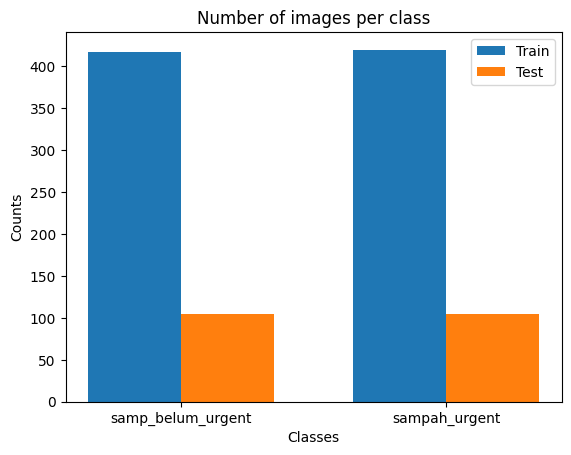

In [ ]:

import matplotlib.pyplot as plt

# Mendapatkan jumlah gambar per kelas
train_counts = np.unique(train_data.classes, return_counts=True)[1]
test_counts = np.unique(test_data.classes, return_counts=True)[1]

# Mendapatkan nama kelas
class_names = list(train_data.class_indices.keys())

# Membuat bar plot
fig, ax = plt.subplots()

bar_width = 0.35
index = np.arange(len(class_names))

bar1 = ax.bar(index, train_counts, bar_width, label='Train')
bar2 = ax.bar(index + bar_width, test_counts, bar_width, label='Test')

ax.set_xlabel('Classes')
ax.set_ylabel('Counts')
ax.set_title('Number of images per class')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(class_names)
ax.legend()

plt.show()

In [ ]:
print(train_counts, test_counts)

[417 420] [104 105]


##Test Data

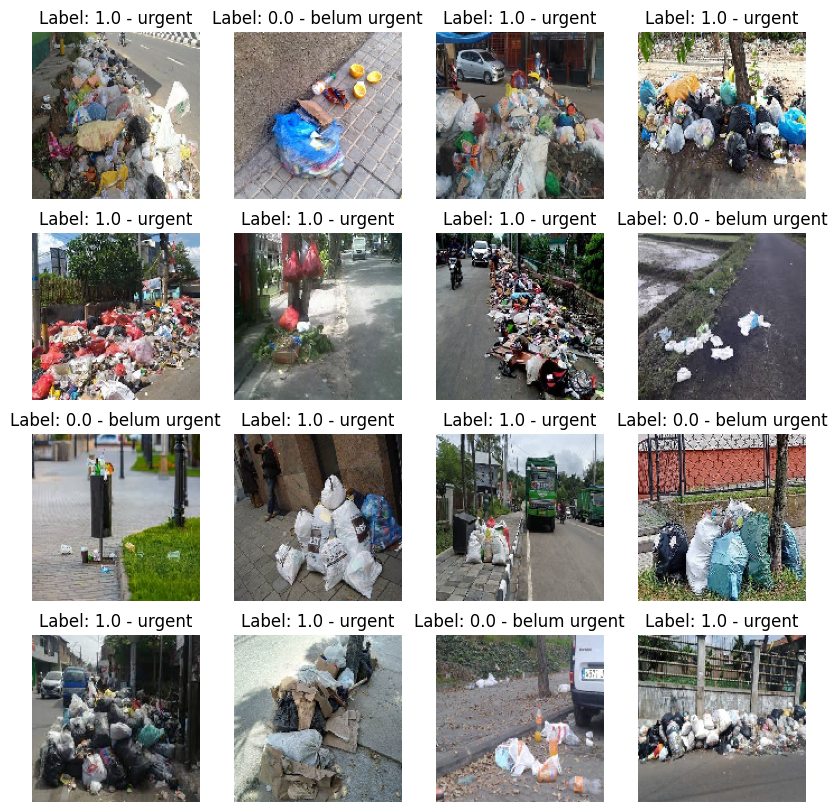

In [ ]:
# Membuat generator untuk mendapatkan satu batch data dari train_data
sample_batch, labels_batch = next(test_data)

# Membuat pemetaan label
label_mapping = {0: 'belum urgent', 1: 'urgent'}

# Menampilkan gambar dan label
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
axes = axes.ravel()

for i in range(16):
    axes[i].imshow(sample_batch[i])
    axes[i].set_title('Label: {} - {}'.format(labels_batch[i], label_mapping[labels_batch[i]]))
    axes[i].axis('off')

plt.show()


##Train Data

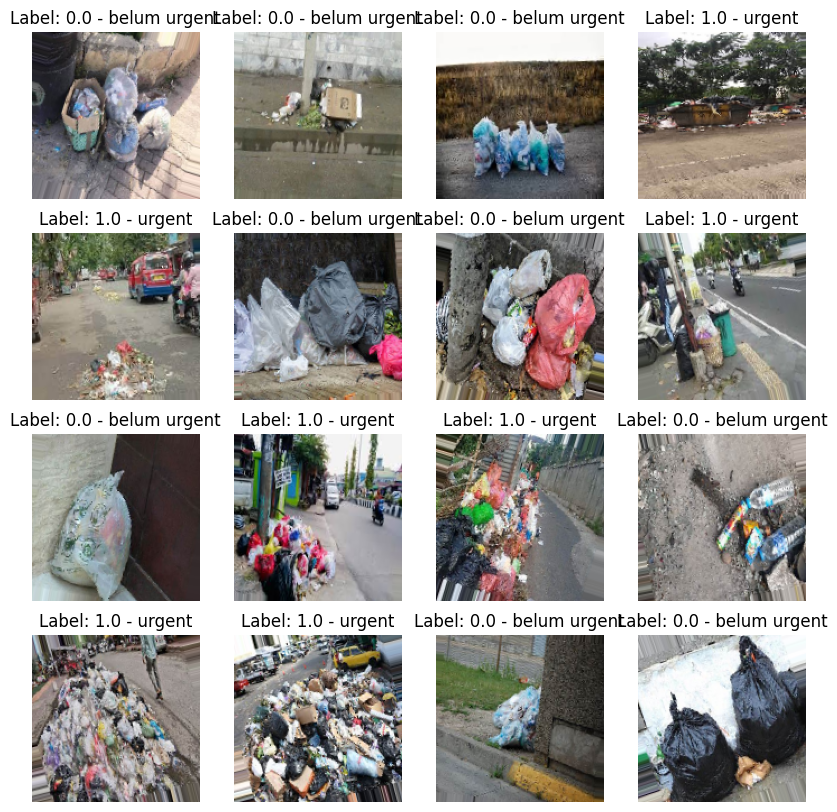

In [ ]:
# Membuat generator untuk mendapatkan satu batch data dari train_data
sample_batch, labels_batch = next(train_data)

# Membuat pemetaan label
label_mapping = {0: 'belum urgent', 1: 'urgent'}

# Menampilkan gambar dan label
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
axes = axes.ravel()

for i in range(16):
    axes[i].imshow(sample_batch[i])
    axes[i].set_title('Label: {} - {}'.format(labels_batch[i], label_mapping[labels_batch[i]]))
    axes[i].axis('off')

plt.show()


##CNN

In [ ]:
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get("accuracy")> 0.95 and logs.get("val_accuracy") > 0.91):
      print("stopp")
      self.model.stop_training = True

callbacks = MyCallback()

In [ ]:
model = Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
#model CNN
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 74, 74, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 36, 36, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 17, 17, 64)       

##CNN Training

In [ ]:
model.compile(optimizer = Adam(learning_rate=0.001),
                loss = "binary_crossentropy",
                metrics = ["accuracy"])
hist = model.fit(train_data, epochs=1000, validation_data=test_data, callbacks=[callbacks])

Epoch 1/1000
14/14 [==============================] - 8s 472ms/step - loss: 1.1052 - accuracy: 0.5221 - val_loss: 0.6898 - val_accuracy: 0.5024
Epoch 2/1000
14/14 [==============================] - 8s 614ms/step - loss: 0.6549 - accuracy: 0.5950 - val_loss: 0.6112 - val_accuracy: 0.6938
Epoch 3/1000
14/14 [==============================] - 7s 481ms/step - loss: 0.5554 - accuracy: 0.7395 - val_loss: 0.6751 - val_accuracy: 0.6746
Epoch 4/1000
14/14 [==============================] - 9s 618ms/step - loss: 0.5847 - accuracy: 0.7037 - val_loss: 0.6068 - val_accuracy: 0.6651
Epoch 5/1000
14/14 [==============================] - 7s 477ms/step - loss: 0.4843 - accuracy: 0.7826 - val_loss: 0.5209 - val_accuracy: 0.7512
Epoch 6/1000
14/14 [==============================] - 9s 671ms/step - loss: 0.5084 - accuracy: 0.7646 - val_loss: 0.4543 - val_accuracy: 0.7847
Epoch 7/1000
14/14 [==============================] - 7s 481ms/step - loss: 0.4378 - accuracy: 0.8088 - val_loss: 0.5397 - val_accuracy:

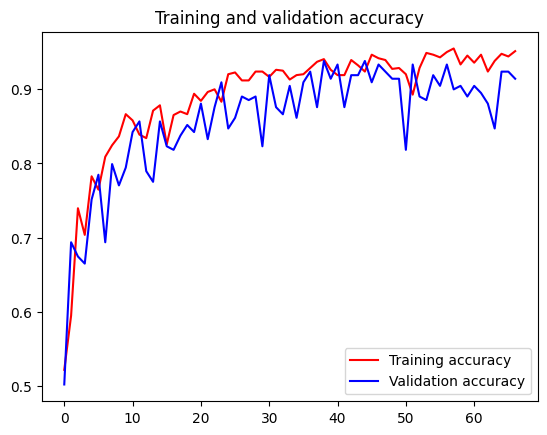

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

#Testing Model using Real Data

Saving WhatsApp Image 2023-12-09 at 2.51.33 PM.jpeg to WhatsApp Image 2023-12-09 at 2.51.33 PM.jpeg
1/1 [==============================] - 0s 28ms/step
[0.03229992]
WhatsApp Image 2023-12-09 at 2.51.33 PM.jpeg is not urgent


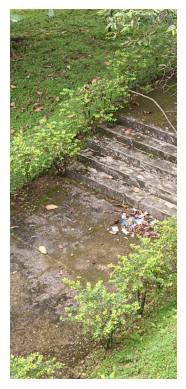

In [ ]:
def display_image(path):
    img = load_img(path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

uploaded=files.upload()
for fn in uploaded.keys():
  path='/content/' + fn
  img=load_img(path, target_size=(150, 150))
  x=img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  image_ = np.vstack([x])
  classes = model.predict(image_, batch_size=10)
  print(classes[0])

  if classes[0]>0.5:
    print(fn + " is urgent")
  else:
    print(fn + " is not urgent")

  display_image(path)


Saving WhatsApp Image 2023-12-15 at 4.32.53 PM.jpeg to WhatsApp Image 2023-12-15 at 4.32.53 PM.jpeg
1/1 [==============================] - 0s 18ms/step
[0.99962497]
WhatsApp Image 2023-12-15 at 4.32.53 PM.jpeg is urgent


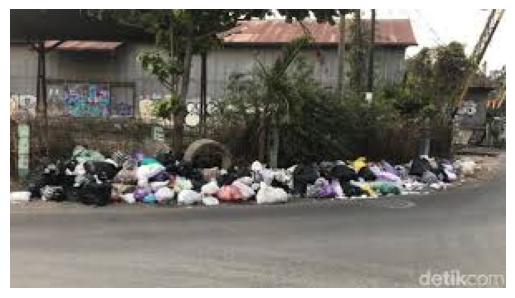

In [ ]:
def display_image(path):
    img = load_img(path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

uploaded=files.upload()
for fn in uploaded.keys():
  path='/content/' + fn
  img=load_img(path, target_size=(150, 150))
  x=img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  image_ = np.vstack([x])
  classes = model.predict(image_, batch_size=10)
  print(classes[0])

  if classes[0]>0.5:
    print(fn + " is urgent")
  else:
    print(fn + " is not urgent")

  display_image(path)


##Save Model

In [ ]:
model.save("mymodel.keras")